In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("global_superstore_2016.xlsx")
df=df[['Order Date','Sales']]
df.head()

,Order Date,Sales
0,2014-11-11,221.980
1,2014-02-05,3709.395
2,2014-10-17,5175.171
3,2014-01-28,2892.510
4,2014-11-05,2832.960


In [3]:
import datetime as dt
df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
sales_data=pd.DataFrame(df.groupby(['Year','Month'])['Sales'].sum())
sales_data.head()

Sales
Year Month              
2012 1       98898.48886
     2      103717.92328
     3      135746.40206
     4      114332.96318
     5      158228.32880

In [4]:
date = pd.date_range(start='1/1/2012',periods=len(sales_data), freq='M')
date

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [5]:
sales_data['Time_Stamp'] = date
sales_data.head()

Sales Time_Stamp
Year Month                         
2012 1       98898.48886 2012-01-31
     2      103717.92328 2012-02-29
     3      135746.40206 2012-03-31
     4      114332.96318 2012-04-30
     5      158228.32880 2012-05-31

In [6]:
sales_data.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
sales_data.head()

,Sales
Time_Stamp,
2012-01-31,98898.48886
2012-02-29,103717.92328
2012-03-31,135746.40206
2012-04-30,114332.96318
2012-05-31,158228.32880


In [7]:
sales_data.describe()

,Sales
count,48.000000
mean,263385.456456
std,113156.113781
min,98854.962080
25%,175175.900230
50%,254557.774310
75%,324256.510015
max,555279.027000


<AxesSubplot:xlabel='Time_Stamp'>

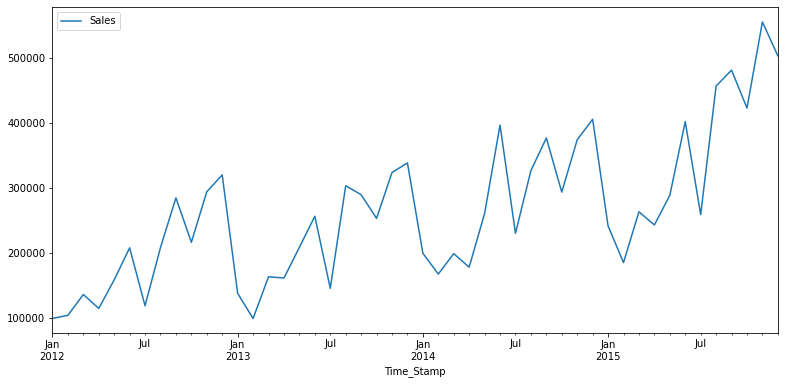

In [8]:
sales_data.plot()

## Decomposition

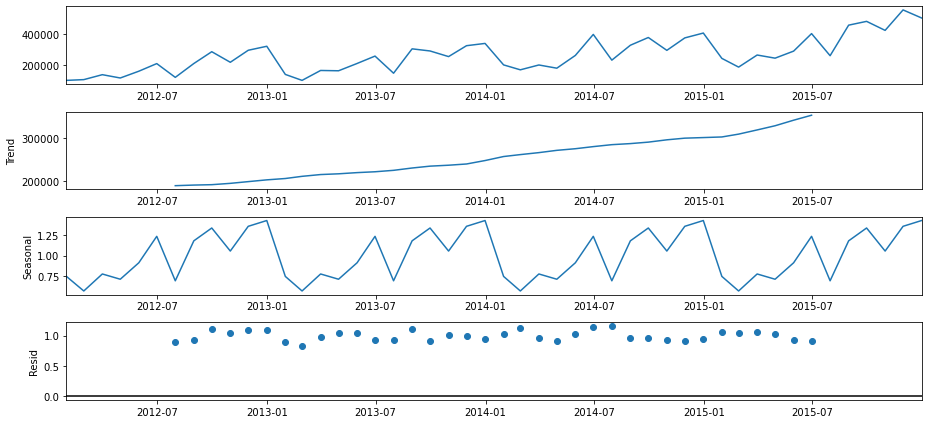

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(sales_data,model='multiplicative')
decomp.plot()
plt.show()

In [10]:
trend = decomp.trend
seasonality = decomp.seasonal
residual = decomp.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2012-01-31              NaN
2012-02-29              NaN
2012-03-31              NaN
2012-04-30              NaN
2012-05-31              NaN
2012-06-30              NaN
2012-07-31    189893.303223
2012-08-31    191296.408435
2012-09-30    192232.550431
2012-10-31    195317.953574
2012-11-30    199353.614773
2012-12-31    203467.811329
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2012-01-31    0.745870
2012-02-29    0.568083
2012-03-31    0.775687
2012-04-30    0.711501
2012-05-31    0.912385
2012-06-30    1.235342
2012-07-31    0.692400
2012-08-31    1.180319
2012-09-30    1.336996
2012-10-31    1.055543
2012-11-30    1.357579
2012-12-31    1.428295
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2012-01-31         NaN
2012-02-29         NaN
2012-03-31         NaN
2012-04-30         NaN
2012-05-31         NaN
2012-06-30         NaN
2012-07-31    0.900768
2012-08-31    0.921487
2012-09-30    1.107284
2012-10-31    1.048253
2012-11-30    1.086126
2012-1

## Stationarity

In [11]:
## Test for stationarity of the series - Dicky Fuller test


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean()
    rolstd = timeseries.rolling(window=6).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
    if dfoutput['p-value']<0.05:
        print('Time Series is Stationary')
    else:
        print('Time Series is not Stationary')

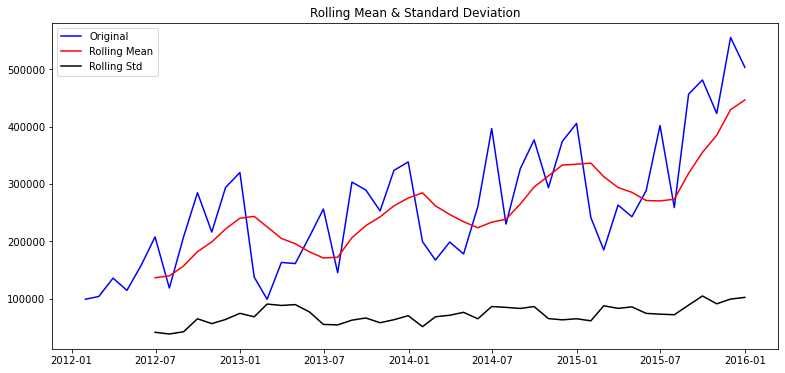

Results of Dickey-Fuller Test:
Test Statistic                  0.637447
p-value                         0.988503
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 

Time Series is not Stationary


In [12]:
test_stationarity(sales_data['Sales'])

Since Data is not stationary, either we need to transform or use differencing to make it stationary

In [13]:
#testing on log transformed data
sales_data['Log_sales']=np.log(sales_data.values)

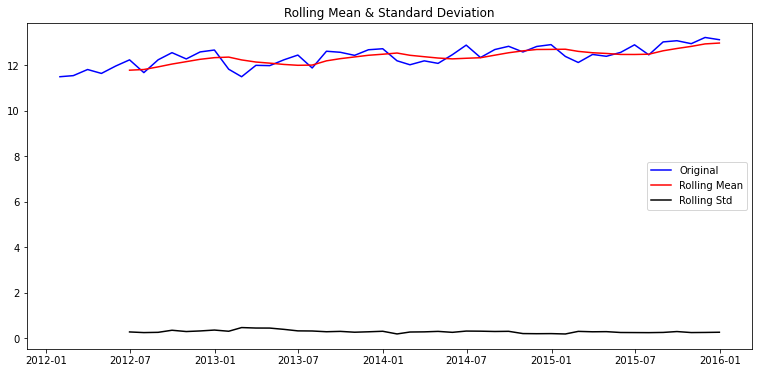

Results of Dickey-Fuller Test:
Test Statistic                 -0.064847
p-value                         0.952829
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 

Time Series is not Stationary


In [14]:
test_stationarity(sales_data['Log_sales'])

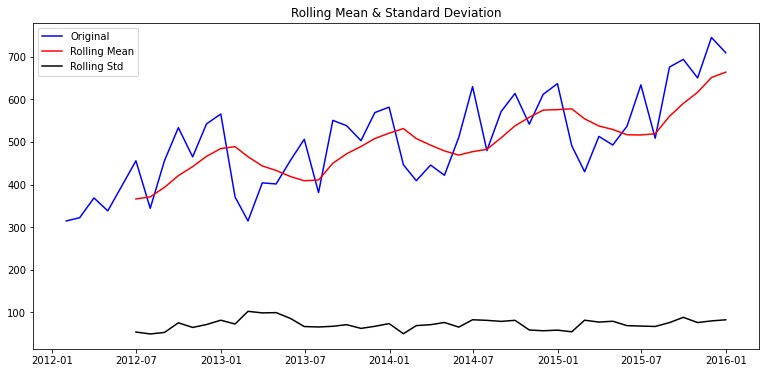

Results of Dickey-Fuller Test:
Test Statistic                  0.282715
p-value                         0.976537
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 

Time Series is not Stationary


In [15]:
#testing on Square Root Transformed data
sales_data['Sqrt_sales']=np.sqrt(sales_data['Sales'])
test_stationarity(sales_data['Sqrt_sales'])

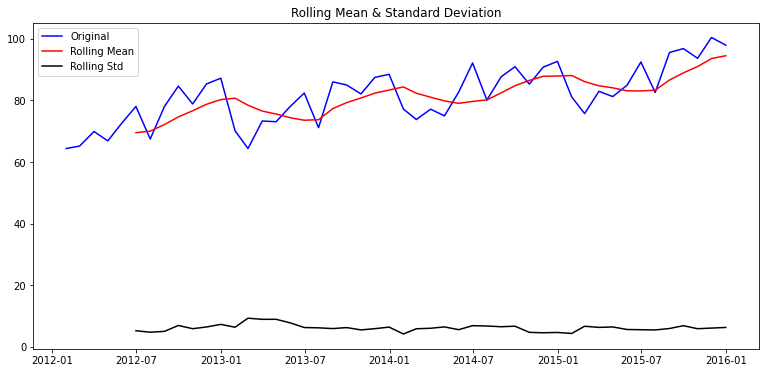

Results of Dickey-Fuller Test:
Test Statistic                  0.104344
p-value                         0.966356
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 

Time Series is not Stationary


In [16]:
#testing on Boxcox Transformed data
from scipy.stats import boxcox
bxcx=boxcox(sales_data['Sales'])
sales_data['BoxCox_sales']=bxcx[0]
test_stationarity(sales_data['BoxCox_sales'])

None of the Transformation helped in making data stationary

Trying to make data stationary with the help of differencing

In [17]:
#Trend Differencing
sales_data['Trend Difference']=sales_data['Sales']-sales_data['Sales'].shift(1)

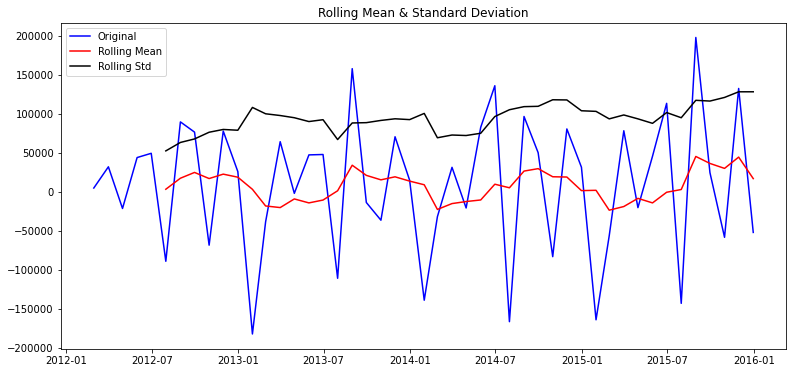

Results of Dickey-Fuller Test:
Test Statistic                -8.497591e+00
p-value                        1.263543e-13
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 

Time Series is Stationary


In [18]:
test_stationarity(sales_data['Trend Difference'].dropna())

In [19]:
sales_data[['Trend Difference']].head()

,Trend Difference
Time_Stamp,
2012-01-31,NaN
2012-02-29,4819.43442
2012-03-31,32028.47878
2012-04-30,-21413.43888
2012-05-31,43895.36562


In [20]:
sales_data[['Sales','Trend Difference']]

,Sales,Trend Difference
Time_Stamp,,
2012-01-31,98898.48886,NaN
2012-02-29,103717.92328,4819.43442
2012-03-31,135746.40206,32028.47878
2012-04-30,114332.96318,-21413.43888
2012-05-31,158228.32880,43895.36562
2012-06-30,207571.54352,49343.21472
2012-07-31,118434.88462,-89136.65890
2012-08-31,208063.28372,89628.39910
2012-09-30,284587.74846,76524.46474


In [21]:
# Splitting data into train test

In [22]:
train=sales_data[['Trend Difference']].dropna()[0:42]
test=sales_data[['Trend Difference']].dropna()[42:]

In [23]:
train.head()

,Trend Difference
Time_Stamp,
2012-02-29,4819.43442
2012-03-31,32028.47878
2012-04-30,-21413.43888
2012-05-31,43895.36562
2012-06-30,49343.21472


In [24]:
test.head()

,Trend Difference
Time_Stamp,
2015-08-31,197914.26188
2015-09-30,24537.30134
2015-10-31,-58390.61454
2015-11-30,132512.39784
2015-12-31,-52135.33352


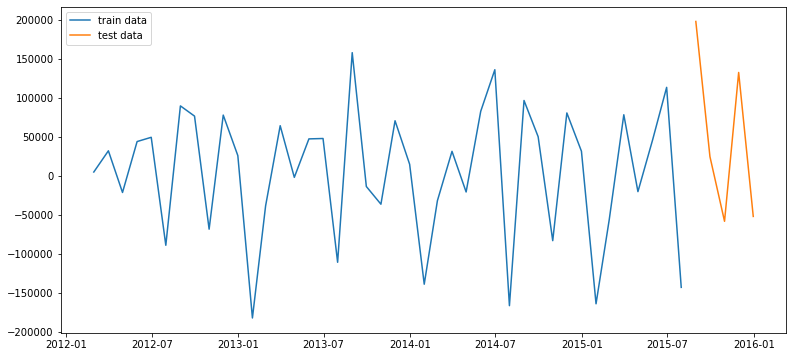

In [25]:
plt.plot(train, label='train data')
plt.plot(test, label='test data')
plt.legend(loc='best')
plt.show()

## AR Model PACF

In [26]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

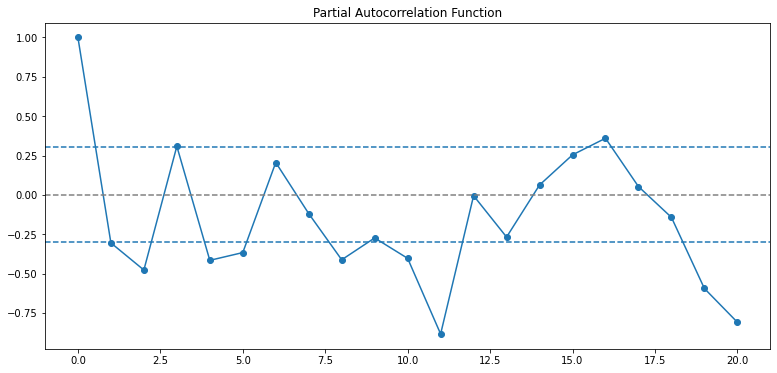

In [27]:
#Plotting PACF
lag_pacf=pacf(train,nlags=20,method='ols')
plt.plot(lag_pacf,marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--')
plt.title('Partial Autocorrelation Function')
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


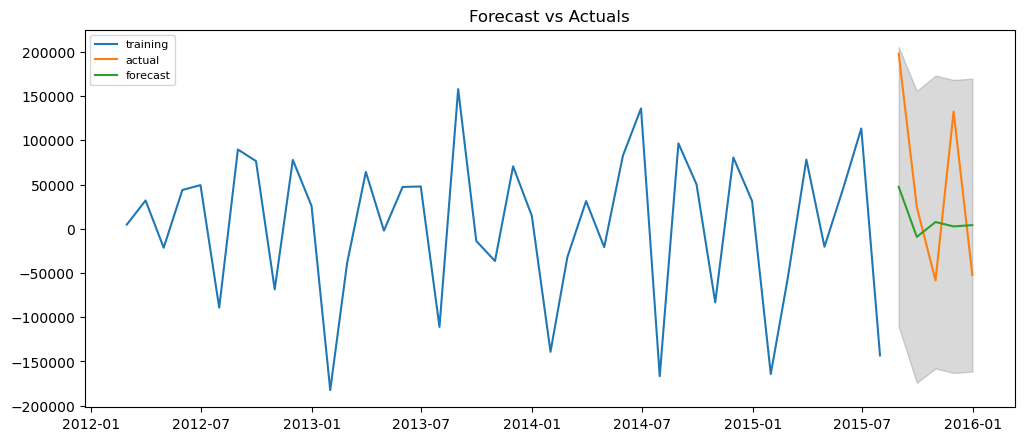

In [28]:
#calling AR model
model = ARIMA(train, order=(1, 0, 0))  
results_AR = model.fit()
fc, se, conf=results_AR.forecast(len(test),alpha=0.05)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(test,fc)
mape

1.0648209753022508

## MA and ACF

In [30]:
from statsmodels.tsa.stattools import acf

Text(0.5, 1.0, 'Autocorrelation Function')

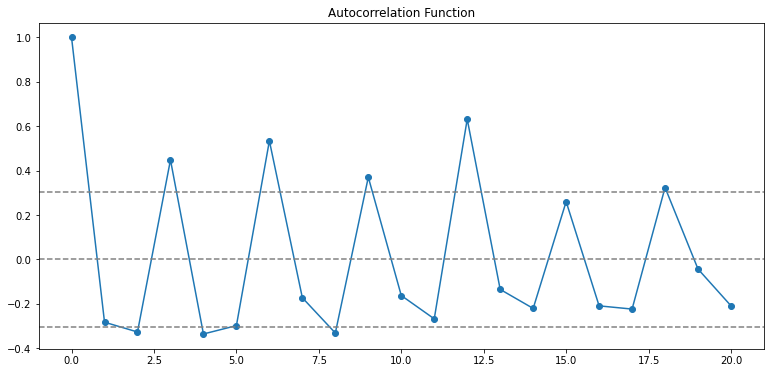

In [31]:
#Plot ACF: 
lag_acf = acf(train, nlags=20)
plt.plot(lag_acf,marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


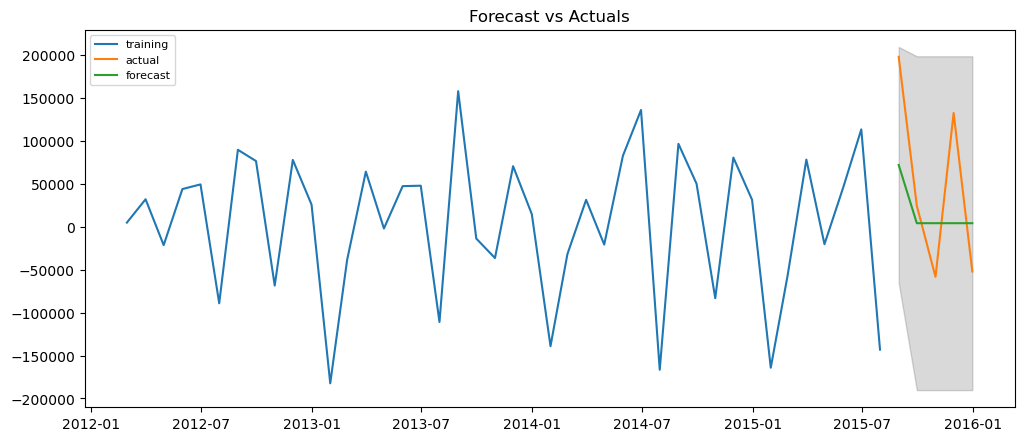

In [32]:
model = ARIMA(train, order=(0, 0, 1))  
results_MA = model.fit()
fc, se, conf=results_MA.forecast(len(test),alpha=0.05)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [33]:
mape=mean_absolute_percentage_error(test,fc)
mape

0.9173234992014343

## ARMA Model

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


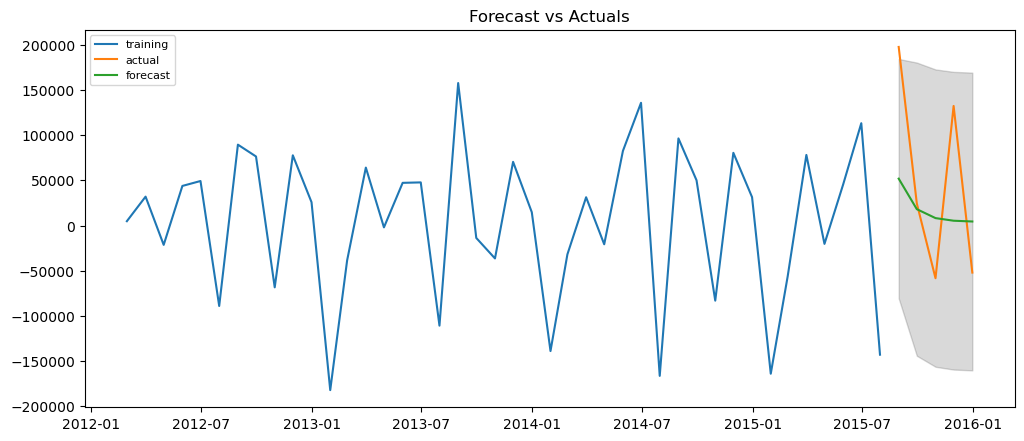

In [34]:
model = ARIMA(train, order=(1,0,1))  
results_ARIMA = model.fit()
fc, se, conf=results_ARIMA.forecast(len(test),alpha=0.05)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [35]:
mape=mean_absolute_percentage_error(test,fc)
mape

0.8369508520519826

## ARIMA Model

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


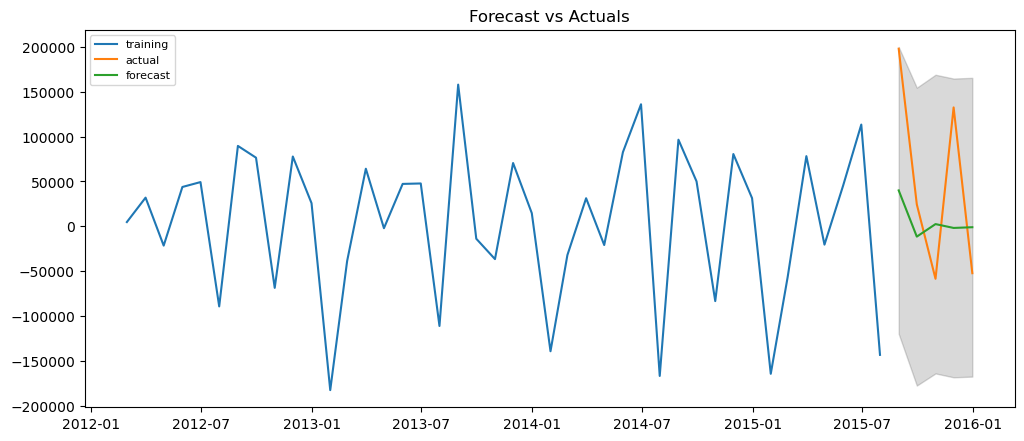

In [36]:
model = ARIMA(train, order=(1,1,1))  
results_ARIMA = model.fit()
fc, se, conf=results_ARIMA.forecast(len(test),alpha=0.05)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [37]:
mape=mean_absolute_percentage_error(test,fc)
mape

1.060307380404802

## Auto Arima

In [38]:
import pmdarima
arima_model= pmdarima.arima.auto_arima(train,m=12)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   42
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -348.378
Date:                              Sun, 12 Sep 2021   AIC                            712.756
Time:                                      17:09:19   BIC                            723.966
Sample:                                           0   HQIC                           716.342
                                               - 42                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -808.3814    483.227     -1.673      0.094   -1755.488     138.725
ar.L1          0.9802      0.317      3.096      0.002       0.360       1.601
ar.L2         -0.3384      0.226     -1.497      0.134      -0.781       0.105
ma.L1         -1.9119      0.319     -6.001      0.000      -2.536      -1.287
ma.L2          0.9203      0.322      2.860      0.004       0.290       1.551
ar.S.L12      -0.8704      0.441     -1.972      0.049      -1.736      -0.005
ma.S.L12       0.6194      0.671      0.923      0.356      -0.696       1.935
sigma2      8.538e+08    1.5e-05   5.68e+13      0.000    8.54e+08    8.54e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.42
Prob(Q):                              0.99   Prob(JB):                         0.07
Heteroskedasticity (H):               0.10   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+31. Standard errors may be unstable.
"""

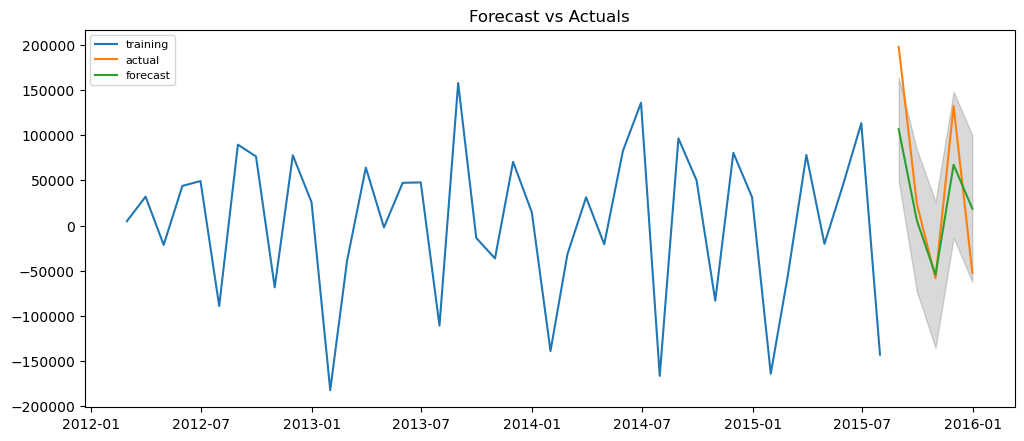

In [39]:
fc, conf=arima_model.predict(n_periods=5,alpha=0.05,return_conf_int=True)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [40]:
mape=mean_absolute_percentage_error(test,fc)
mape

0.6280533806323283

In [42]:
predictions_ARIMA_diff = pd.Series(fc, copy=True)
print(predictions_ARIMA_diff.head())

0    106730.684815
1      5828.585806
2    -54583.547607
3     67348.415588
4     18775.314316
dtype: float64


In [43]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

0    106730.684815
1    112559.270620
2     57975.723013
3    125324.138601
4    144099.452917
dtype: float64


In [49]:
testcum=test.cumsum()

In [50]:
mean_absolute_percentage_error(testcum,predictions_ARIMA_diff_cumsum)

0.5178523626605418